In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
raw_data = {
    'Region': ['USA', 'China', 'Russia', 'India', 'UK', 'Australia', 'Europe', 'Brazil', 'South Africa', np.nan],
    'Product': ['A', 'V', 'A', 'C', 'B', 'D', 'D', 'D', 'E', 'A'],
    'Sales': [100, 125, 130, 200, 124, 245, 524, 10000, 231, np.nan],
    'Profit': [23, 42, 12, 42, 53, 123, 52, 5000, 23, np.nan]
}

In [3]:
df_1 = pd.DataFrame(raw_data)
print(df_1)

         Region Product    Sales  Profit
0           USA       A    100.0    23.0
1         China       V    125.0    42.0
2        Russia       A    130.0    12.0
3         India       C    200.0    42.0
4            UK       B    124.0    53.0
5     Australia       D    245.0   123.0
6        Europe       D    524.0    52.0
7        Brazil       D  10000.0  5000.0
8  South Africa       E    231.0    23.0
9           NaN       A      NaN     NaN


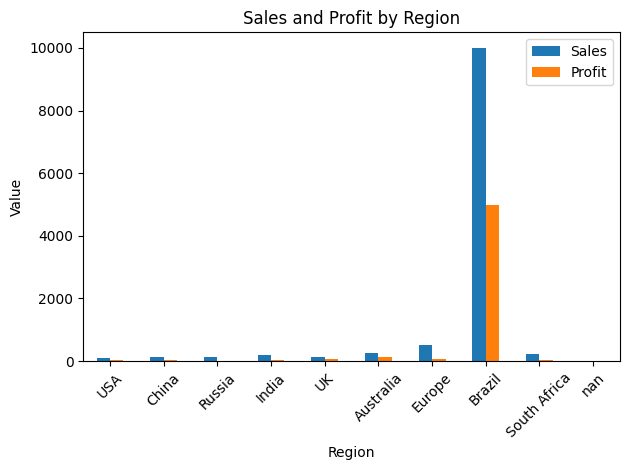

In [4]:
df_1.plot(x='Region', y=['Sales', 'Profit'], kind='bar')
plt.title('Sales and Profit by Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

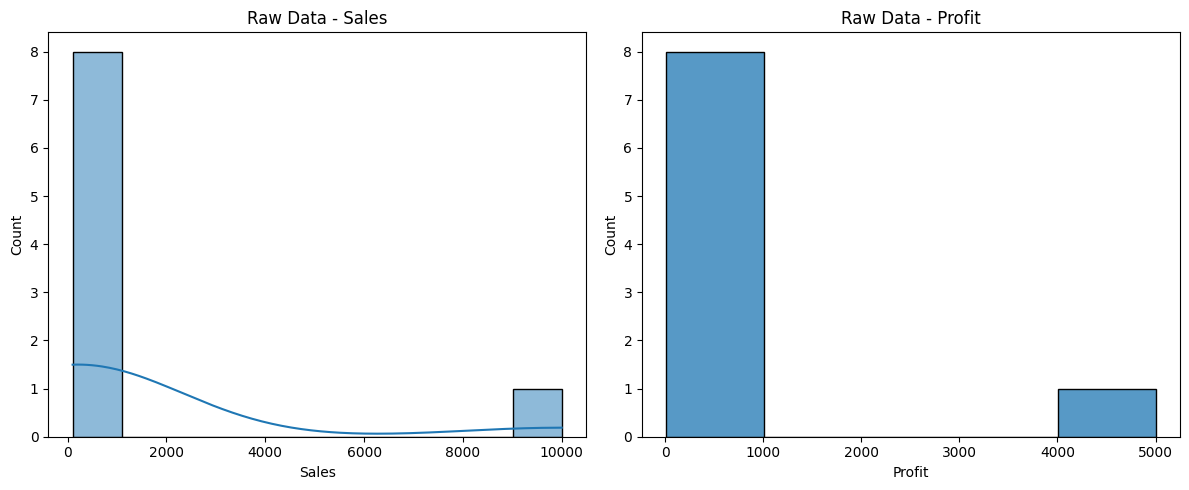

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   9 non-null      object 
 1   Product  10 non-null     object 
 2   Sales    9 non-null      float64
 3   Profit   9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_1['Sales'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Raw Data - Sales')
sns.histplot(df_1['Profit'], bins=5, kde=False, ax=axes[1])
axes[1].set_title('Raw Data - Profit')
plt.tight_layout()
plt.show()
df_1.info()

In [6]:
df = df_1.copy()
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df['Sales'].fillna(df['Sales'].mean(), inplace=True)
print(df)

         Region Product         Sales       Profit
0           USA       A    100.000000    23.000000
1         China       V    125.000000    42.000000
2        Russia       A    130.000000    12.000000
3         India       C    200.000000    42.000000
4            UK       B    124.000000    53.000000
5     Australia       D    245.000000   123.000000
6        Europe       D    524.000000    52.000000
7        Brazil       D  10000.000000  5000.000000
8  South Africa       E    231.000000    23.000000
9     Australia       A   1297.666667   596.666667


/tmp/ipykernel_18114/3058838888.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna(df['Region'].mode()[0], inplace=True)
/tmp/ipykernel_18114/3058838888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [7]:
for col in ['Sales', 'Profit']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  print(Q1, Q3)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

print(df)

126.25 454.25
27.75 105.5
         Region Product   Sales   Profit
0           USA       A  100.00   23.000
1         China       V  125.00   42.000
2        Russia       A  130.00   12.000
3         India       C  200.00   42.000
4            UK       B  124.00   53.000
5     Australia       D  245.00  123.000
6        Europe       D  524.00   52.000
7        Brazil       D  946.25  222.125
8  South Africa       E  231.00   23.000
9     Australia       A  946.25  222.125


In [8]:
scaler = MinMaxScaler()
df[['Profit', 'Sales']] = scaler.fit_transform(df[['Profit', 'Sales']])
print(df)

         Region Product     Sales    Profit
0           USA       A  0.000000  0.052350
1         China       V  0.029542  0.142772
2        Russia       A  0.035451  0.000000
3         India       C  0.118168  0.142772
4            UK       B  0.028360  0.195122
5     Australia       D  0.171344  0.528257
6        Europe       D  0.501034  0.190363
7        Brazil       D  1.000000  1.000000
8  South Africa       E  0.154801  0.052350
9     Australia       A  1.000000  1.000000


In [9]:
le_region = LabelEncoder()
le_product = LabelEncoder()

df['Region'] = le_region.fit_transform(df['Region'])
df['Product'] = le_product.fit_transform(df['Product'])

print(df)

   Region  Product     Sales    Profit
0       8        0  0.000000  0.052350
1       2        5  0.029542  0.142772
2       5        0  0.035451  0.000000
3       4        2  0.118168  0.142772
4       7        1  0.028360  0.195122
5       0        3  0.171344  0.528257
6       3        3  0.501034  0.190363
7       1        3  1.000000  1.000000
8       6        4  0.154801  0.052350
9       0        0  1.000000  1.000000


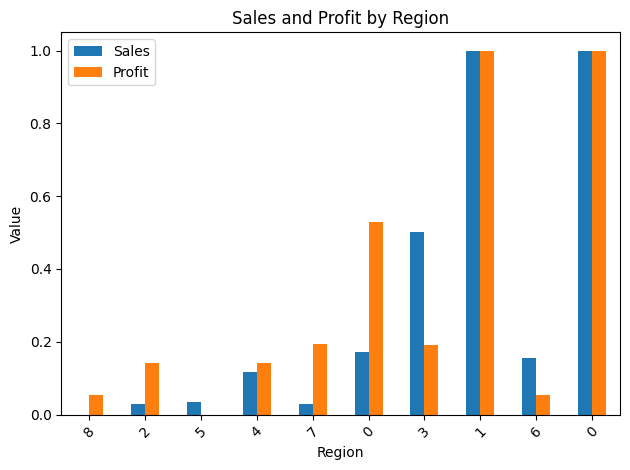

In [10]:
df.plot(x='Region', y=['Sales', 'Profit'], kind='bar')
plt.title('Sales and Profit by Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

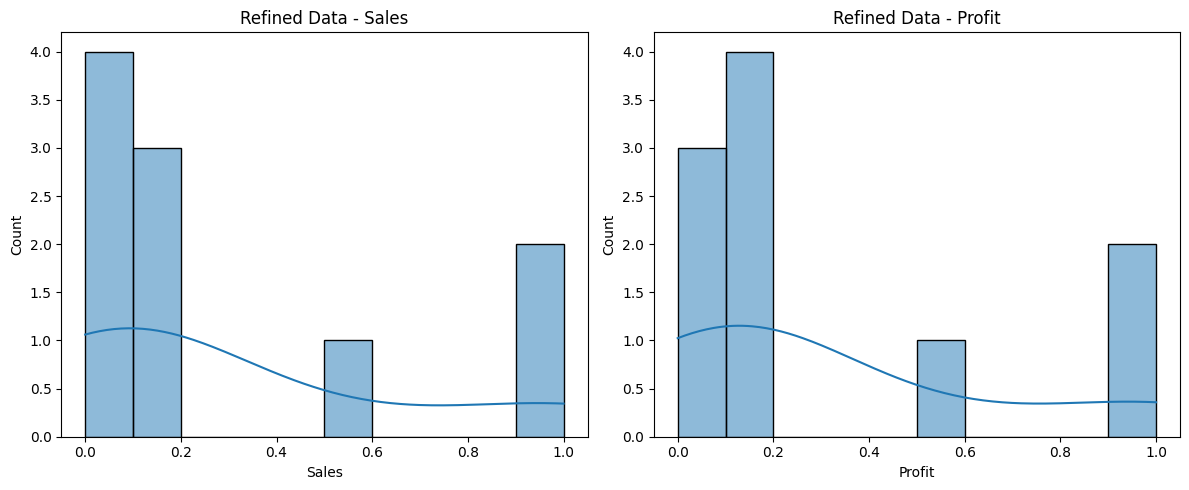

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Sales'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Refined Data - Sales')
sns.histplot(df['Profit'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Refined Data - Profit')
plt.tight_layout()
plt.show()